In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import locale

## Dataset:  calendar.csv

Source: Inside Airbnb

Description: Detailed Listings data for New Orleans (as of March 2019)

Key Variables/Columns
         
o listing_id          
o price           
o date         
o available: t or f         

In [4]:
#Read in calendar.csv into a pandas DataFrame
cal = pd.read_csv('Resources/calendar.csv.gz')
print('We have',cal.date.nunique(), 'days and', cal.listing_id.nunique(),'unique listings in the March calendar data')

We have 365 days and 6632 unique listings in the March calendar data


In [3]:
# Calendar covers one year
cal.date.min(), cal.date.max()

('2019-03-06', '2020-03-04')

In [4]:
# f = not available; t = available
cal.available.value_counts()

f    1319314
t    1101366
Name: available, dtype: int64

C:\Users\Brianna\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


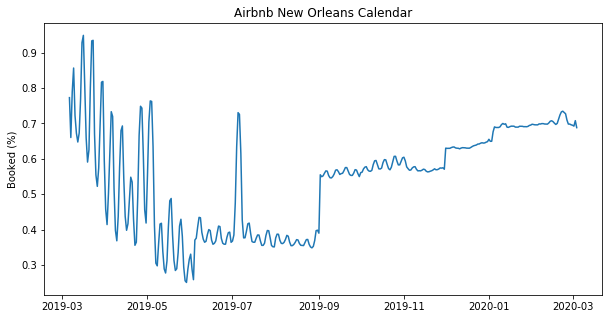

In [7]:
# Convert from f/t to 1/0
cal_new = cal [['date', 'available']]
cal_new['booked'] = cal_new.available.map(lambda x: 0 if x=='t' else 1)
cal_new = cal_new.groupby('date')['booked'].mean().reset_index()
cal_new['date'] = pd.to_datetime(cal_new['date'])

plt.figure(figsize=(10,5))
plt.plot(cal_new['date'], cal_new['booked'])
plt.title('Airbnb New Orleans Calendar')
plt.ylabel('Booked (%)')
plt.savefig('booked_no_cal.png')
plt.show()

In [ ]:
# Remove characters from price
locale.setlocale(locale.LC_ALL,'')
cal['price']=cal.price.map(lambda x: locale.atof(x.strip('$')))
cal['price'].head()
cal.reset_index(drop=True)
cal.head()

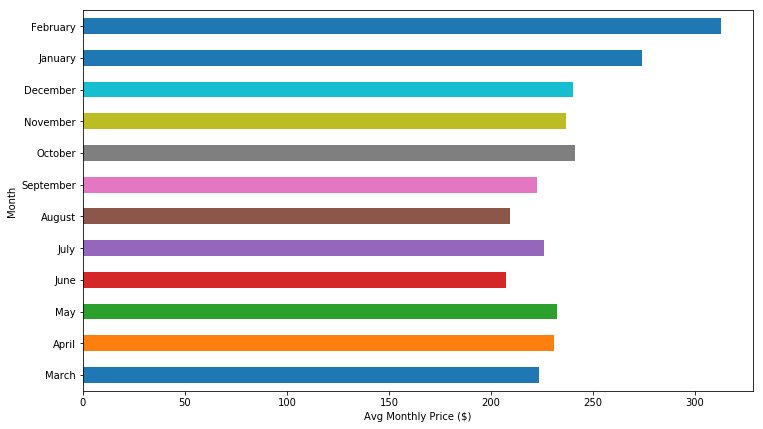

In [7]:
# Price change over year (by month)
cal['date'] = pd.to_datetime(cal['date'])

mean_cal_by_mo = cal.groupby(cal['date'].dt.strftime('%B'), sort=False)['price'].mean()
mean_cal_by_mo.plot (kind='barh', figsize=(12,7))
plt.xlabel('Avg Monthly Price ($)')
plt.ylabel('Month')
plt.savefig('price_by_mo_cal.png')

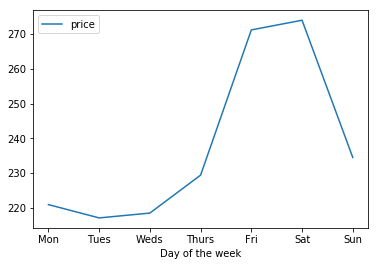

In [8]:
# Price over year (by day of the week)
cal['dayofweek'] = cal.date.dt.weekday_name
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_wk = cal[['dayofweek', 'price']]
price_wk = cal.groupby(['dayofweek']).mean().reindex(days)
price_wk.drop('listing_id', axis=1, inplace=True)
price_wk.drop('minimum_nights', axis=1, inplace=True)
price_wk.drop('maximum_nights', axis=1, inplace=True)
price_wk.plot()
ticks = list(range(0,len(days),1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.xlabel('Day of the week')
plt.savefig('price_by_wkday.png')

## Dataset:  listings.csv

Source: Inside Airbnb

Description: Detailed Listings data for New Orleans (as of March 2019)

Key Variables/Columns         
o id         
o price: 15 - 8000         
o review_scores_rating: 20-100 (dropping nan/blank)         
o last_scraped: March 2019 (current data)         


In [9]:
# Read in recent listing.csv file into a pandas DataFrame
mar = pd.read_csv('Resources/listings.csv.gz')
print('We have', mar.id.nunique(), 'listings in the March listing data.')

We have 6632 listings in the March listing data.


In [ ]:
# # Read in archival data?
# # Read the Feb csv.gz file into a pandas DataFrame
# feb = pd.read_csv('../Resources/Feb/listings.csv.gz')
# feb['last_scraped'] = pd.to_datetime (feb['last_scraped'])
# # feb['month'] = feb['last_scraped'].dt.month
# # feb = feb[['price', 'review_scores_rating', 'month']]
# feb = feb[['price', 'last_scraped', 'neighbourhood_cleansed', 'review_scores_rating']]
# feb = feb.dropna(axis=0, how="any")
# feb.head()

# Repeat code for each month

# # Concat if read in multiple monthly csvs
# dframes = [mar, feb, jan, dec, nov, octb, sep, aug, jul, may, apr]
# lst = pd.concat(dframes)
# lst.head()

In [10]:
# If reading in only mar data, set as 'lst'
lst = mar
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10291,https://www.airbnb.com/rooms/10291,20190306190816,2019-03-06,Spacious Cottage in Mid-City!,NaN,"Spacious house located in Mid-City, New Orlean...","Spacious house located in Mid-City, New Orlean...",none,NaN,...,f,f,moderate,t,f,1,1,0,0,0.99
1,19091,https://www.airbnb.com/rooms/19091,20190306190816,2019-03-06,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,SEE SPECIAL REDUCED SUMMER PRICING! This apa...,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,none,"NorthWest Carrollton, where this apartment is ...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,3.99
2,26834,https://www.airbnb.com/rooms/26834,20190306190816,2019-03-06,Maison Mandeville in the Marigny,NaN,Charming shotgun apartment in the Marigny neig...,Charming shotgun apartment in the Marigny neig...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,2.10
3,53173,https://www.airbnb.com/rooms/53173,20190306190816,2019-03-06,MARDI GRAS YA’LL HUNDREDS 5 STAR REVIEWS !!!,Current articles in NYTimes and travel magazi...,This is a VERY large bedroom - boasting queen ...,Current articles in NYTimes and travel magazi...,none,"Funky creative types (sorta like Williamsburg,...",...,t,f,strict_14_with_grace_period,f,f,2,1,1,0,1.32
4,53544,https://www.airbnb.com/rooms/53544,20190306190816,2019-03-06,Historical Bywater Mother in Law Cottage,We are little slice of authentic NOLA living.....,We offering up a New Orleans experience. Our...,We are little slice of authentic NOLA living.....,none,Kentucky st not a very well known street in Ne...,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,1.76


In [ ]:
# What data do we have?
# lst.dtypes
# lst.count()

In [11]:
# Remove characters from price
locale.setlocale(locale.LC_ALL,'')
lst['price']=lst.price.map(lambda x: locale.atof(x.strip('$')))
lst['price'].head()
lst.reset_index(drop=True)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10291,https://www.airbnb.com/rooms/10291,20190306190816,2019-03-06,Spacious Cottage in Mid-City!,NaN,"Spacious house located in Mid-City, New Orlean...","Spacious house located in Mid-City, New Orlean...",none,NaN,...,f,f,moderate,t,f,1,1,0,0,0.99
1,19091,https://www.airbnb.com/rooms/19091,20190306190816,2019-03-06,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,SEE SPECIAL REDUCED SUMMER PRICING! This apa...,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,none,"NorthWest Carrollton, where this apartment is ...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,3.99
2,26834,https://www.airbnb.com/rooms/26834,20190306190816,2019-03-06,Maison Mandeville in the Marigny,NaN,Charming shotgun apartment in the Marigny neig...,Charming shotgun apartment in the Marigny neig...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,2.10
3,53173,https://www.airbnb.com/rooms/53173,20190306190816,2019-03-06,MARDI GRAS YA’LL HUNDREDS 5 STAR REVIEWS !!!,Current articles in NYTimes and travel magazi...,This is a VERY large bedroom - boasting queen ...,Current articles in NYTimes and travel magazi...,none,"Funky creative types (sorta like Williamsburg,...",...,t,f,strict_14_with_grace_period,f,f,2,1,1,0,1.32
4,53544,https://www.airbnb.com/rooms/53544,20190306190816,2019-03-06,Historical Bywater Mother in Law Cottage,We are little slice of authentic NOLA living.....,We offering up a New Orleans experience. Our...,We are little slice of authentic NOLA living.....,none,Kentucky st not a very well known street in Ne...,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,1.76
5,66972,https://www.airbnb.com/rooms/66972,20190306190816,2019-03-06,The Retreat in Lovely Bayou St John,NaN,Available for corporate rental on a month-to-m...,Available for corporate rental on a month-to-m...,none,We love our neighborhood! It is close to every...,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,1.93
6,71624,https://www.airbnb.com/rooms/71624,20190306190816,2019-03-06,Ravenwood Manor (Historic Bywater),You are in for a very unique stay in a neighbo...,Spacious furnished Bywater shotgun apartment. ...,You are in for a very unique stay in a neighbo...,none,"Ours is a neighborhood made up of artists, mus...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,2.07
7,74498,https://www.airbnb.com/rooms/74498,20190306190816,2019-03-06,Maison Marais 1: Large Local Living,Maison Marais 1 is a stylish one-bedroom apart...,︎Here’s a sampling of what our guests have sai...,Maison Marais 1 is a stylish one-bedroom apart...,none,"This is a vibrant, diverse neighborhood of mos...",...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,4.57
8,76674,https://www.airbnb.com/rooms/76674,20190306190816,2019-03-06,Luxury & history in the Big Easy #1,"NOW WITH 2 BIKES! 1920's built, fully renovate...",NOW WITH 2 BIKES! Private room with bathroom i...,"NOW WITH 2 BIKES! 1920's built, fully renovate...",none,"Bywater is classic New Orleans, but without th...",...,f,f,moderate,f,f,2,0,2,0,2.24
9,79536,https://www.airbnb.com/rooms/79536,20190306190816,2019-03-06,SpaciousCleanFunctional Private Apt,Walking distance to Jazzfest Conveniently loca...,For rent is a private spacious 635sq ft apartm...,Walking distance to Jazzfest Conveniently loca...,none,"I love that it's down to earth, welcoming, his...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,4.40


In [14]:
# lst.count()
# Cannot delete nan from dataset, will have to delete ad hoc for analysis

id                                              6632
listing_url                                     6632
scrape_id                                       6632
last_scraped                                    6632
name                                            6630
summary                                         6509
space                                           5578
description                                     6592
experiences_offered                             6632
neighborhood_overview                           5069
notes                                           3933
transit                                         5034
access                                          4635
interaction                                     5125
house_rules                                     4771
thumbnail_url                                      0
medium_url                                         0
picture_url                                     6632
xl_picture_url                                

In [ ]:
# # lst.describe()
# # 50% = 135; 75% = 206
# lst50 = lst.loc[lst["price"] < 135, :]
# lst50.head()

In [ ]:
# # Average monthly price for all months by date - used with concat dataset
# mean_of_mo = lst.groupby(lst['last_scraped'].dt.strftime('%B'), sort=False)['price'].mean()
# mean_of_mo.plot(kind='barh', figsize=(12,7))
# plt.xlabel('avg monthly price')
# plt.ylabel('date')

In [12]:
# Neighborhood listing count
lst.groupby(by='neighbourhood_cleansed').count()[['price']].sort_values(by='price', ascending=False).head(10)

,price
neighbourhood_cleansed,
Central Business District,886
Central City,474
Seventh Ward,440
Treme - Lafitte,397
Mid-City,384
Marigny,362
Lower Garden District,282
St. Claude,242
Bywater,235


C:\Users\Brianna\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


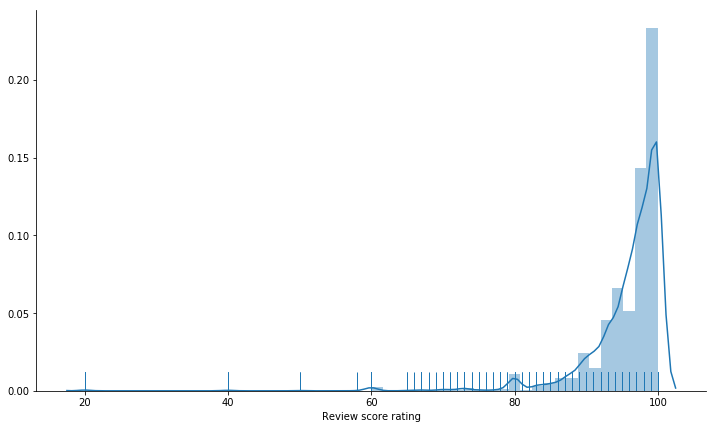

<Figure size 432x288 with 0 Axes>

In [13]:
# Review score distribution graph
plt.figure(figsize=(12,7))
sns.distplot(lst.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.xlabel('Review score rating')
plt.show()
plt.savefig('review_scores.png')

In [18]:
lst.review_scores_rating.describe()

count    5984.000000
mean       95.765207
std         6.128125
min        20.000000
25%        94.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [14]:
lst.price.describe()

count    6632.000000
mean      219.983112
std       283.078703
min        15.000000
25%        95.000000
50%       142.000000
75%       225.500000
max      8000.000000
Name: price, dtype: float64

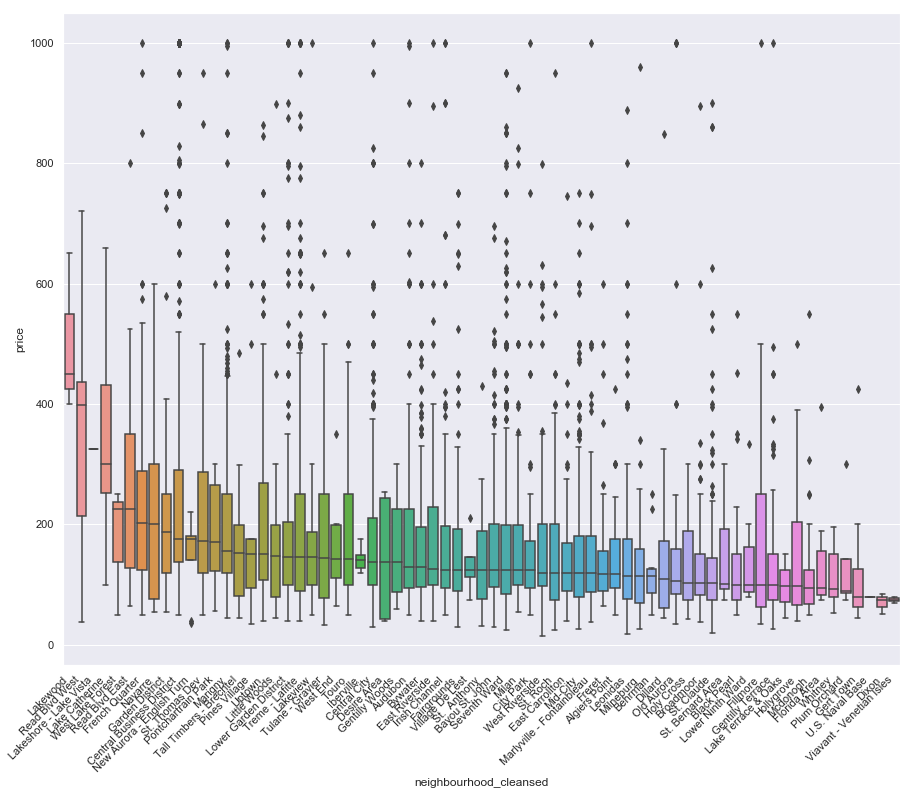

In [15]:
# Boxplots - neighborhood by price
sort_price = lst.loc[(lst.price <=1000)]\
                .groupby('neighbourhood_cleansed')['price']\
                .median()\
                .sort_values(ascending=False)\
                .index
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(y='price', x='neighbourhood_cleansed',data=lst.loc[(lst.price <=1000)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig('ngbhd_by_price_under1k.png')
plt.show()

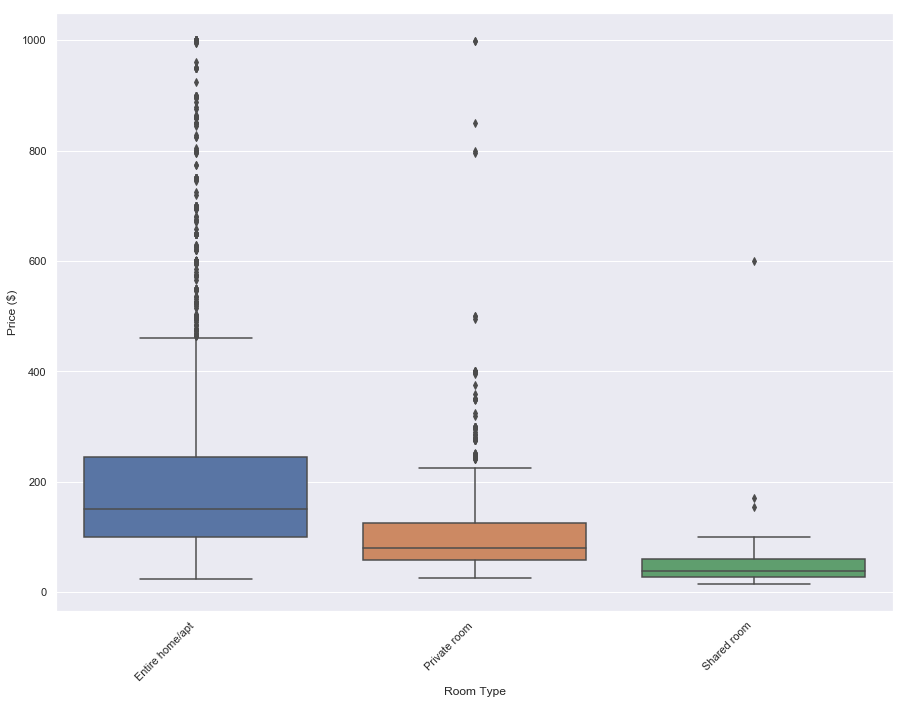

In [18]:
# Boxplots - rm type by price
sort_price = lst.loc[(lst.price <=1000)]\
                .groupby('room_type')['price']\
                .median()\
                .sort_values(ascending=False)\
                .index
sns.set(rc={'figure.figsize':(15,11)})
sns.boxplot(y='price', x='room_type',data=lst.loc[(lst.price <=1000)], order=sort_price)
# sns.boxplot(y='price', x='room_type',data=lst.price, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.savefig('room_by_price_under1k.png')
plt.show()

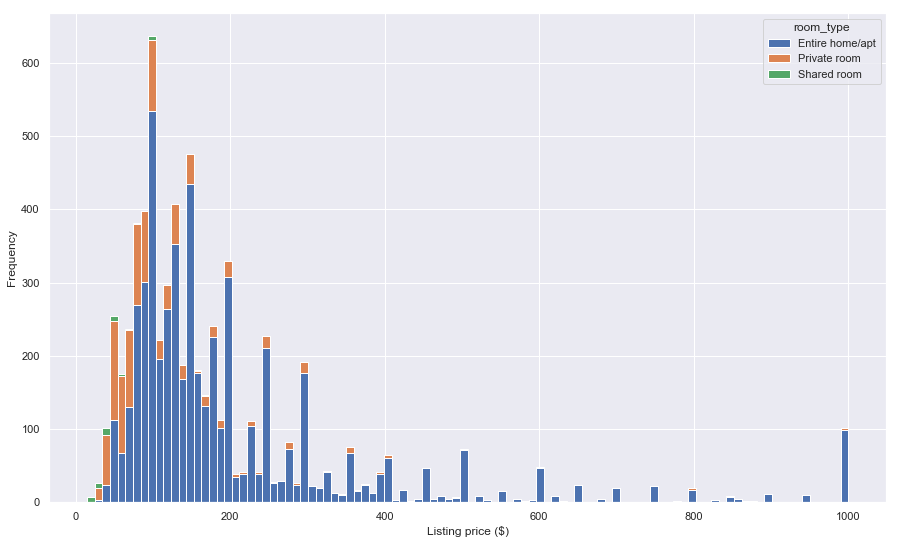

In [15]:
# Frequency of listing price - histogram
lst.loc[(lst.price <= 1000) & (lst.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price ($)')
plt.savefig('listing_freq_under1k.png')

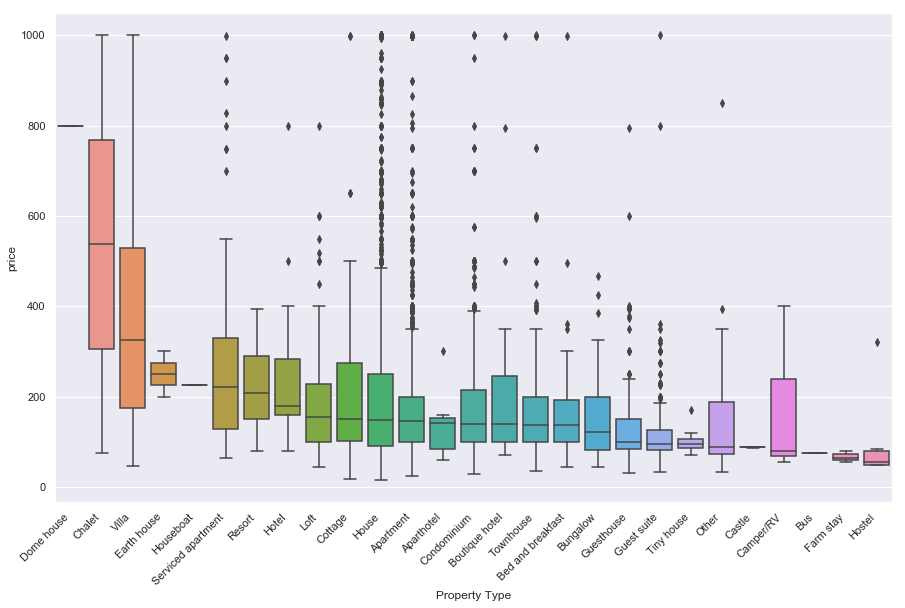

In [16]:
# Boxplots - property type by price
sort_price = lst.loc[(lst.price <=1000)]\
                .groupby('property_type')['price']\
                .median()\
                .sort_values(ascending=False)\
                .index
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(y='price', x='property_type',data=lst.loc[(lst.price <=1000)], order=sort_price)
# sns.boxplot(y='price', x='room_type',data=lst.price, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Property Type')
plt.savefig('property_by_price_under1k.png')
plt.show()

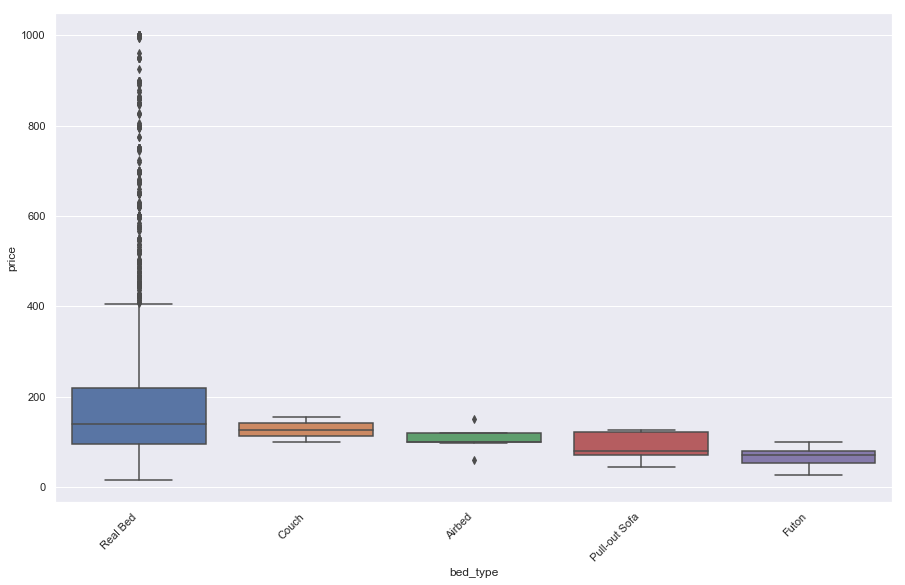

In [17]:
# Boxplots - property type by price
sort_price = lst.loc[(lst.price <=1000)]\
                .groupby('bed_type')['price']\
                .median()\
                .sort_values(ascending=False)\
                .index
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(y='price', x='bed_type',data=lst.loc[(lst.price <=1000)], order=sort_price)
# sns.boxplot(y='price', x='room_type',data=lst.price, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig('bed_by_price_under1k.png')
plt.show()

In [19]:
lst.amenities = lst.amenities.str.replace("[{}]", "").str.replace('"', "")
lst['amenities'].head()

0    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
1    TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...
2    TV,Internet,Wifi,Air conditioning,Free street ...
3    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
4    Internet,Wifi,Air conditioning,Pets allowed,Pe...
Name: amenities, dtype: object

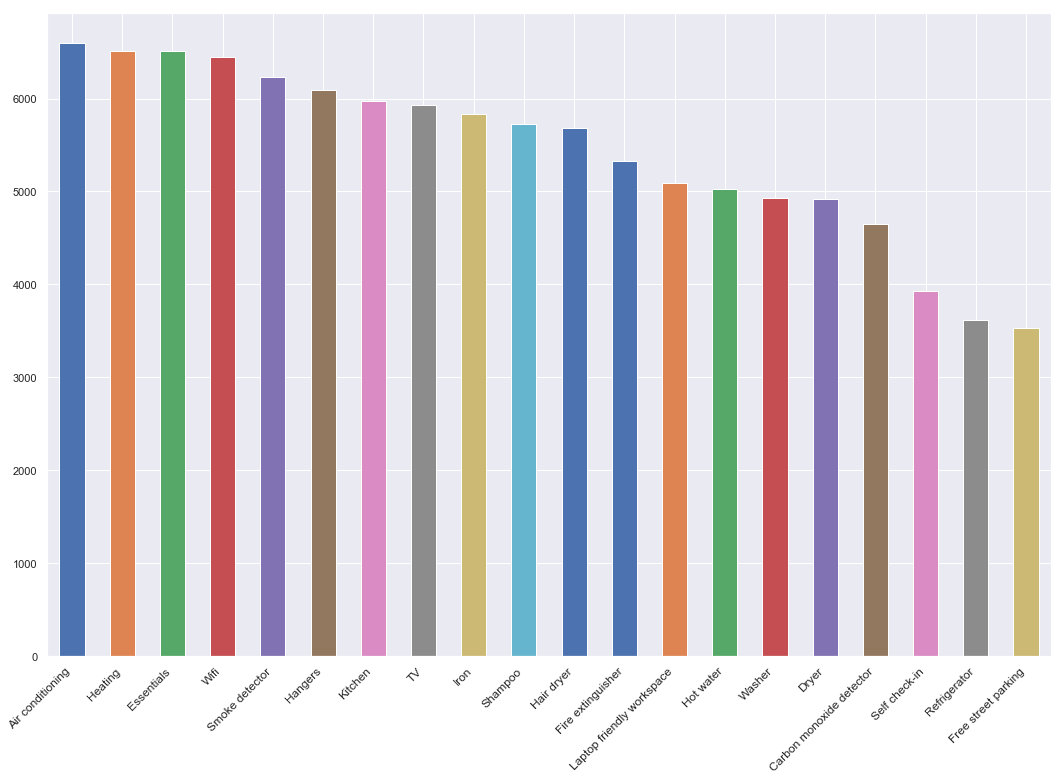

In [22]:
pd.Series(np.concatenate(lst['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig('common_amenities_under1k.png')
plt.show();

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
lst.amenities = lst.amenities.str.replace("[{}]", "").str.replace('"', "")
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(lst['amenities'])
amenities_df = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
amenities_df = amenities_df.drop('',1)

In [24]:
# Convert from f/t to 1/0
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    lst[c] = lst[c].replace('f',0,regex=True)
    lst[c] = lst[c].replace('t',1,regex=True)

In [25]:
# Clean data e.g. remove the $
lst['security_deposit'] = lst['security_deposit'].fillna(value=0)
lst['security_deposit'] = lst['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
lst['cleaning_fee'] = lst['cleaning_fee'].fillna(value=0)
lst['cleaning_fee'] = lst['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

In [26]:
# Select the numeric values
lst_new = lst[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]

In [27]:
# Fill in the missing values
for col in lst_new.columns[lst_new.isnull().any()]:
    lst_new[col] = lst_new[col].fillna(lst_new[col].median())

C:\Users\Brianna\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# Deal with categorical variables
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    lst_new = pd.concat([lst_new, pd.get_dummies(lst[cat_feature])], axis=1)

In [29]:
# Join!
lst_new = pd.concat([lst_new, amenities_df], axis=1, join='inner')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = lst_new['price']
x = lst_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 240.616
R^2 test: 0.457


In [32]:
coefs = pd.DataFrame()
coefs['est_int'] = X_train.columns
coefs['coefs'] = rf.feature_importances_
coefs.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
14,bedrooms,0.150005
9,cleaning_fee,0.109938
13,bathrooms,0.108048
308,private bathroom,0.101549
10,host_listings_count,0.098413
11,host_total_listings_count,0.094165
8,security_deposit,0.037315
16,number_of_reviews,0.027501
12,minimum_nights,0.018080
15,guests_included,0.017718


In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

# X = lst.zipcode.str.extract('(\d+)').astype(int).values.reshape(-1, 1)
X = lst.cleaning_fee.values.reshape(-1, 1)
y = lst.review_scores_cleanliness.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

In [ ]:
# Plot the data

plt.scatter(X, y)

In [ ]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

In [ ]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

In [ ]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

In [ ]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [ ]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('lr_price_v_zipcode.png')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Recall:
 - A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
 - R^2 (coefficient of determination) regression score function.
     - Best possible score is 1.0 and it can be negative 
     - A constant model that always predicts the expected value of y, disregarding the input features, would get R^2 score 0.0.

In [ ]:
# Overall Score for the model
model.score(X, y)

## Dataset:  listings.csv

Key Variables/Columns

x accommodates: 1-16        
o square_feet: 0-3600 (drop nan/blank)         
o bathrooms: 0.5-14.5 (drop nan/blanks; drop/correct 54.5)        
o bedrooms: 0-10 (drop nan/blanks)           

In [ ]:
mlr = pd.read_csv('../Resources/listings.csv')
mlr = mlr[['square_feet', 'bathrooms', 'bedrooms']]
mlr = mlr.dropna(axis=0, how="any")
mlr.head()

In [ ]:
mlr.count()

In [ ]:
X = mlr[["bathrooms", "bedrooms"]]
y = mlr["square_feet"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig('mlr_bbsq.png')
plt.show()

In [ ]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression data set
data = datasets.load_diabetes()
X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])

visualizer = FeatureCorrelation(labels=feature_names)
# visualizer = FeatureCorrelation()
visualizer.fit(X, y)
visualizer.poof()

In [ ]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression data set
data = datasets.load_diabetes()
X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])

discrete_features = [False for _ in range(len(feature_names))]
discrete_features[1] = True

visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels=feature_names)
visualizer.fit(X, y, discrete_features=discrete_features, random_state=0)
visualizer.poof()

Sources:   
PermutationImportance: https://www.kaggle.com/dansbecker/permutation-importance
GradientBoostingRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
lst = pd.read_csv('../Resources/listings.csv.gz')
# lst = lst[['price', 'review_scores_rating']]
# lst = lst.dropna(axis=0, how="any")
lst.head()

In [ ]:
lst.columns

In [ ]:
lst['review_scores_cleanliness'].head()

In [ ]:
data = all_listings.dropna(axis=0, how='any')
data.shape

y = data['price']
X = data.drop(['price', 'lat_center', 'lon_center', 'longitude', 'latitude', 'city_index'], axis=1) 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

%%time 
regr = GradientBoostingRegressor(n_estimators=75, learning_rate=0.31, max_depth=4, subsample=1.0,
                                 random_state=42)
regr.fit(X_train, y_train)
print(r2_score(y_val, regr.predict(X_val)))

perm = PermutationImportance(regr, random_state=42).fit(X_val, y_val)
eli5.show_weights(perm, top=X.shape[1], feature_names = X.columns.tolist())